# seasonality in time series
A repeating pattern within each year is known as seasonal variation, although the
term is applied more generally to repeating patterns within any fixed period.

Understanding seasonality is beneficial as it helps:
- Clearer singal
- More information


Types of Seasonality

- Time of Day
- Daily
- Weekly
- Monthly
- Yearly

## Removing Seasonaliy

also called __seasonal adjustment , or deseasonalizing__.
- A time series where the seasonal component has been removed is called seasonal stationary.
- A time series with a clear seasonal component is referred to as non-stationary.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
temp = pd.read_csv(r"./Datasets/daily-min-temperatures.csv"
                   ,index_col=0,parse_dates=True)

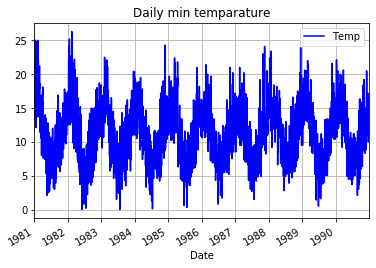

In [3]:
_ = temp.plot(style='b',grid=True).set(title="Daily min temparature")

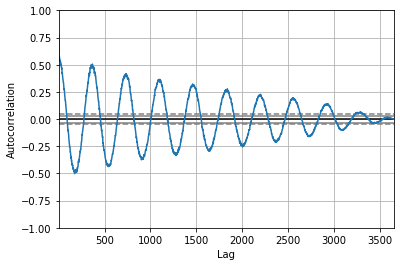

In [4]:
# lets look at auto-correlation 
# which will reveal seasonality
pd.plotting.autocorrelation_plot(temp)

### Method 1 : Seasonal Adjustment with Differencing

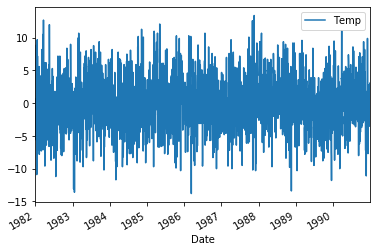

In [5]:
temp.diff(365).dropna().plot()
# Each day data is substracted from that specific day
# value for the previous year
# the problem if how will one adjuste for leap years etc

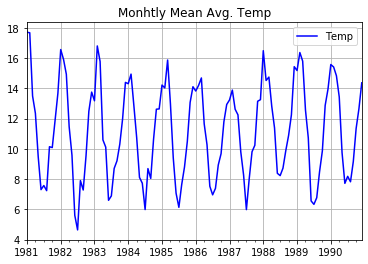

In [6]:
_ = (temp.resample("M").mean().plot(grid=True,color='b')
.set(xlabel='',title='Monhtly Mean Avg. Temp'))
# most likley the temp - remains stable for a month 
# in a year and we can see that while taking one month
# avg and then taking difference of a month value
# from its previous year value

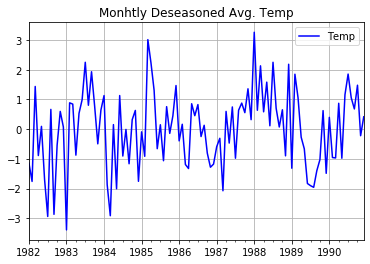

In [7]:
_ = (temp.resample("M").mean().diff(12).dropna().plot(grid=True,color='b')
.set(xlabel='',title='Monhtly Deseasoned Avg. Temp'))

we can use the monthly average minimum temperatures from the same month in the previous year to adjust the daily minimum temperature dataset. Again, we just skip the first year of data, but the correction using the monthly rather than the daily data may be a more stable approach.

C:\Users\91882\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


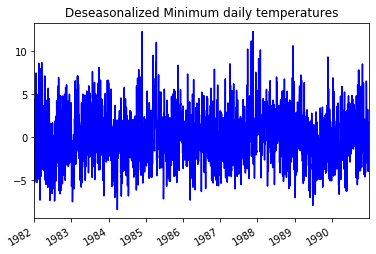

In [8]:
temp_monthly_avg  = temp.groupby(pd.Grouper(freq='M')).mean()
temp_monthly_avg.index = temp_monthly_avg.index.strftime("%Y-%m")
temp['mean'] = temp_monthly_avg.loc[(temp.index-pd.offsets.Day(365)).strftime("%Y-%m")].values

_ = (temp['Temp'] - temp['mean']).dropna().plot(color='b').set(xlabel='',title='Deseasonalized Minimum daily temperatures')


The edge of calendar months provides a hard boundary that may not make sense for temperature data. More  exible approaches that take the average from one week either side of the same date in the previous year may again be a better approach. Additionally, there is likely to be seasonality in temperature data at multiple scales that may be corrected for directly or
indirectly, such as:
- Day level.
- Multiple day level, such as a week or weeks.
- Multiple week level, such as a month.
- Multiple month level, such as a quarter or season.

## Method 2: Seasonal Adjustment with Modelling

We can model the seasonal component directly, then subtract it from the observations. The seasonal component in a given time series is likely a sine wave over a generally fixed period and amplitude. This can be approximated easily using a curve fitting method. A dataset can be
constructed with the time index of the sine wave as an input, or x-axis, and the observation as the output, or y-axis.

Note:
Here we are trying to model daily level seasonality in the data i.e.
the period should repeat after 365 days. i.e. mod of 365

In [9]:
temp = temp['Temp']

In [10]:
# assuming a poly fit of 
# order 4 
# fit polynomial : x^4*b4 + x^3*b3 +... + b0

Betas  [-1.17365250e-08  9.32487472e-06 -2.17302086e-03  1.21124495e-01
  1.38742039e+01]


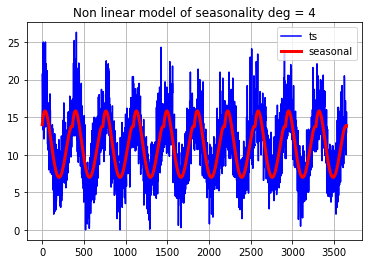

In [11]:
deg = 4 # degree of curve 
x = pd.np.arange(1,len(temp)+1)%365
betas =  pd.np.polyfit(x,temp.values,deg=deg)
print ("Betas ",betas)
p = pd.np.poly1d(betas)

plt.plot(temp.values,color='b')
plt.plot(p(x),linewidth=3,color='r')
plt.grid(True)
plt.legend(['ts','seasonal'])
_ = plt.title("Non linear model of seasonality deg = {}".format(deg))

## degree is the lowest degree (arrived by trial and error)
# for which the seasonality is close to sinusidal wave

[Text(0.5, 0, ''), Text(0.5, 1.0, 'Deseasonalied Min Daily temp')]

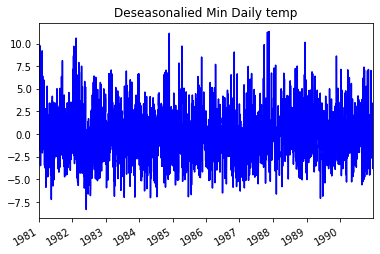

In [12]:
(temp - p(x)).plot(color='b').set(
title='Deseasonalied Min Daily temp',xlabel='')

In [13]:
# monthly seasonality
temp_monthly = temp.groupby(pd.Grouper(freq='M')).mean()

Betas  [ 0.05060481 -0.69020596  1.38411575 14.32230354]


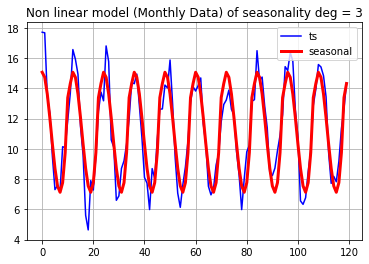

In [14]:
deg = 3
x = pd.np.arange(1,len(temp_monthly)+1)%12 ## seasonality is 12 months i.e. m
betas  =  pd.np.polyfit(x,temp_monthly,deg)
print("Betas ",betas)
p = pd.np.poly1d(betas)
plt.plot(temp_monthly.values,color='b')
plt.plot(p(x),linewidth=3,color='r')
plt.legend(['ts','seasonal'])
plt.grid(True)
_ = plt.title("Non linear model (Monthly Data) of seasonality deg = {}".format(deg))

## deg 4 is like a complete overlap!!

## Summary
The importance of seasonality in time series and the opportunities for data preparation
and feature engineering it provides.
- How to use the difference method to create a seasonally adjusted time series.
- How to model the seasonal component directly and subtract it from observations.